In [1]:
import pandas as pd
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('train.csv')

In [3]:
y = pd.DataFrame(data['label'])
x = data.drop('label', axis =1)

In [4]:
p =np.array(x)

In [5]:
%matplotlib inline

In [6]:
some_digit = p[36000]
some_digit_image = some_digit.reshape(28,28)

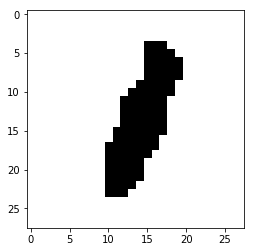

In [7]:
import matplotlib
plt.imshow(some_digit_image, cmap= matplotlib.cm.binary, interpolation="nearest")

In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.1, random_state =42, stratify = y)

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
clf = LogisticRegression(tol = 0.3, solver = 'lbfgs')

In [10]:
clf.fit(x_train,y_train)

C:\Users\abcd\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\abcd\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.3, verbose=0,
                   warm_start=False)

In [11]:
y_pred= clf.predict(x_test)

In [12]:
from sklearn.model_selection import cross_val_score

In [13]:
a = cross_val_score(clf,x_train,y_train , scoring='accuracy')

C:\Users\abcd\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\abcd\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\abcd\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was

In [14]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(clf,x_train, y_train )

C:\Users\abcd\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\abcd\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\abcd\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was

In [15]:
a.mean()

0.915079365079365

In [16]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,y_pred)

0.3180952380952381

## Confusing metrix

In [17]:
from sklearn.metrics import f1_score
f1_score(y_train, y_train_pred, average ='micro')

0.915079365079365

In [18]:
f1_score(y_train, y_train_pred, average =None)

array([0.95987159, 0.96177298, 0.90013495, 0.8904197 , 0.92081633,
       0.87009694, 0.94517251, 0.92778551, 0.87240437, 0.89099776])

In [19]:
test = pd.read_csv('test.csv')


In [20]:
predicted =  clf.predict(test)

In [21]:
pred_csv = pd.DataFrame(data = {'ImageId':np.arange(1,28001),'Label':predicted})

In [22]:
pred_csv.to_csv('predictednew.csv')

In [89]:
import cv2 as cv


In [97]:
img = cv.imread('download.png',0)

In [98]:
img.shape

(28, 28)

In [99]:
img = img.reshape(28*28)

In [100]:
clf.predict([img])

array([5], dtype=int64)